In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [16]:
teams_df = pd.read_csv('data/2025/mens_l2_ne_teams.csv')
teams_df

,Club ID,Club
0,175310,ALLIANCE UNITED L2 MEN
1,183427,THE BOROUGH FC L2 MEN
2,175389,MASTER'S FA L2 MEN
3,175416,PICKERING FC L2 MEN
4,183418,WHITBY FC L2 MEN
5,175360,SIMCOE COUNTY ROVERS FC L2 MEN
6,183426,SUDBURY CYCLONES L2 MEN
7,175296,VAUGHAN AZZURRI L2 MEN
8,175410,UNIONVILLE MILLIKEN SC L2 MEN


In [17]:
scores_df = pd.read_csv('data/2025/2025-06-28_mens_l2_ne_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,262600488,1,3,175416,175410
1,262600489,2,0,175310,183418
2,262600490,1,1,175360,183427
3,262600491,2,3,175389,175296
4,262600492,1,3,175410,175296
5,262600494,0,3,183426,175310
6,262600495,11,1,175296,175410
7,262600496,0,0,183418,183427
8,262600497,1,1,175310,183426
9,262600498,4,3,175389,175360


In [18]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [19]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           ALLIANCE UNITED L2 MEN  THE BOROUGH FC L2 MEN  MASTER'S FA L2 MEN  PICKERING FC L2 MEN  WHITBY FC L2 MEN  SIMCOE COUNTY ROVERS FC L2 MEN  SUDBURY CYCLONES L2 MEN  VAUGHAN AZZURRI L2 MEN  UNIONVILLE MILLIKEN SC L2 MEN
262600488                       0                      0                   0                   -1                 0                               0                        0                       0                              1
262600489                       1                      0                   0                    0                -1                               0                        0                       0                              0
262600490                       0                     -1                   0                    0                 0                               1                        0                       0                              0
262600491                       0                      0                  -1            

In [20]:
print(X_df.T.to_string())

                                262600488  262600489  262600490  262600491  262600492  262600494  262600495  262600496  262600497  262600498  262600499  262600500  262600501  262600502  262600503  262600504  262600505  262600506  262600507  262600508  262600509  262600510  262600511  262600512  262600513  262600515  262600516  262600517  262600519  262600520  262600521  262600522  262600523  262600524  262600525  262600526  262600527  262600528  262600529  262600530  262600532  262600533
ALLIANCE UNITED L2 MEN                  0          1          0          0          0          1          0          0          1          0          0          0          1          0          0          0          0          0          0          1          0          0          0          0          0          0          0          0         -1          0          0          1          0          0          0         -1          0          0          0         -1         -1          0
THE BOROUGH FC

In [21]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                                ALLIANCE UNITED L2 MEN  THE BOROUGH FC L2 MEN  MASTER'S FA L2 MEN  PICKERING FC L2 MEN  WHITBY FC L2 MEN  SIMCOE COUNTY ROVERS FC L2 MEN  SUDBURY CYCLONES L2 MEN  VAUGHAN AZZURRI L2 MEN  UNIONVILLE MILLIKEN SC L2 MEN
ALLIANCE UNITED L2 MEN                              10                     -2                   0                    0                -2                              -2                       -2                      -1                             -1
THE BOROUGH FC L2 MEN                               -2                     12                  -1                   -1                -2                              -2                       -1                      -2                             -1
MASTER'S FA L2 MEN                                   0                     -1                   9                   -2                -1                              -1                       -1                      -2                             -1
PICK

In [22]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                                ALLIANCE UNITED L2 MEN  THE BOROUGH FC L2 MEN  MASTER'S FA L2 MEN  PICKERING FC L2 MEN  WHITBY FC L2 MEN  SIMCOE COUNTY ROVERS FC L2 MEN  SUDBURY CYCLONES L2 MEN  VAUGHAN AZZURRI L2 MEN  UNIONVILLE MILLIKEN SC L2 MEN
ALLIANCE UNITED L2 MEN                              10                     -2                   0                    0                -2                              -2                       -2                      -1                             -1
THE BOROUGH FC L2 MEN                               -2                     12                  -1                   -1                -2                              -2                       -1                      -2                             -1
MASTER'S FA L2 MEN                                   0                     -1                   9                   -2                -1                              -1                       -1                      -2                             -1
PICK

In [23]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                                GD
ALLIANCE UNITED L2 MEN           7
THE BOROUGH FC L2 MEN           -6
MASTER'S FA L2 MEN             -10
PICKERING FC L2 MEN             -9
WHITBY FC L2 MEN                 6
SIMCOE COUNTY ROVERS FC L2 MEN   5
SUDBURY CYCLONES L2 MEN        -13
VAUGHAN AZZURRI L2 MEN          32
UNIONVILLE MILLIKEN SC L2 MEN    0


In [24]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                                GD with limited blowouts
ALLIANCE UNITED L2 MEN                                 7
THE BOROUGH FC L2 MEN                                 -5
MASTER'S FA L2 MEN                                    -9
PICKERING FC L2 MEN                                   -6
WHITBY FC L2 MEN                                       5
SIMCOE COUNTY ROVERS FC L2 MEN                         4
SUDBURY CYCLONES L2 MEN                              -11
VAUGHAN AZZURRI L2 MEN                                20
UNIONVILLE MILLIKEN SC L2 MEN                          0


In [25]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                                massey_rating
VAUGHAN AZZURRI L2 MEN               2.699677
ALLIANCE UNITED L2 MEN               0.827913
WHITBY FC L2 MEN                     0.811634
SIMCOE COUNTY ROVERS FC L2 MEN       0.302374
THE BOROUGH FC L2 MEN               -0.104492
UNIONVILLE MILLIKEN SC L2 MEN       -0.944574
MASTER'S FA L2 MEN                  -0.952115
SUDBURY CYCLONES L2 MEN             -1.247501
PICKERING FC L2 MEN                 -1.392915


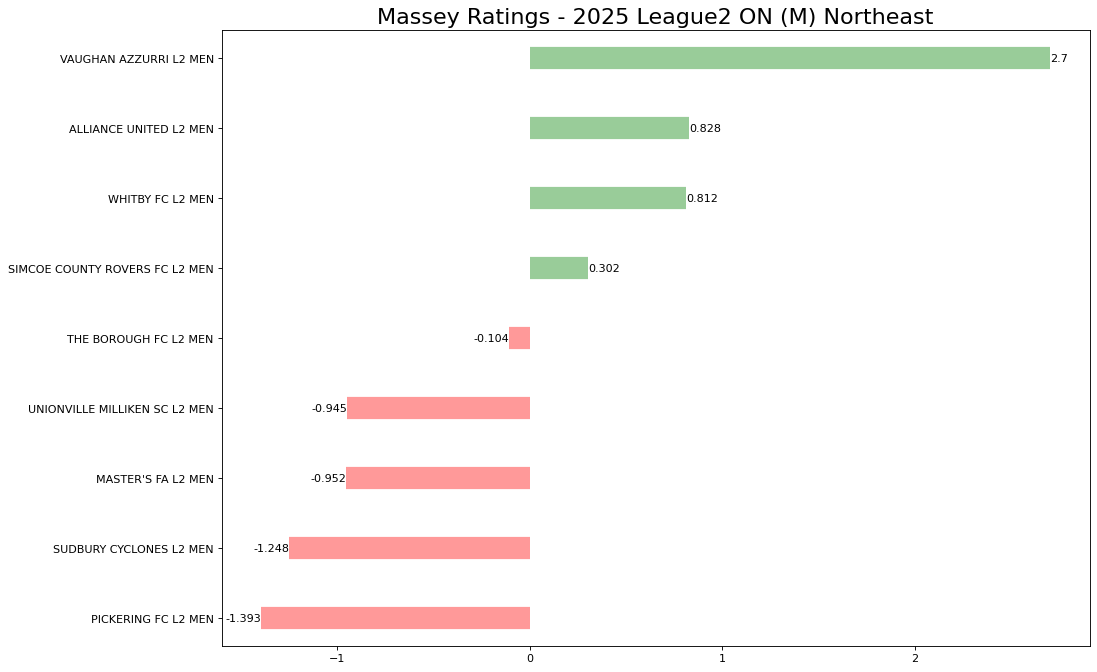

In [26]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Northeast', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [27]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                                massey_rating
VAUGHAN AZZURRI L2 MEN               1.668299
ALLIANCE UNITED L2 MEN               0.782846
WHITBY FC L2 MEN                     0.662439
SIMCOE COUNTY ROVERS FC L2 MEN       0.299246
THE BOROUGH FC L2 MEN               -0.122090
UNIONVILLE MILLIKEN SC L2 MEN       -0.319560
MASTER'S FA L2 MEN                  -0.907818
PICKERING FC L2 MEN                 -0.963629
SUDBURY CYCLONES L2 MEN             -1.099733


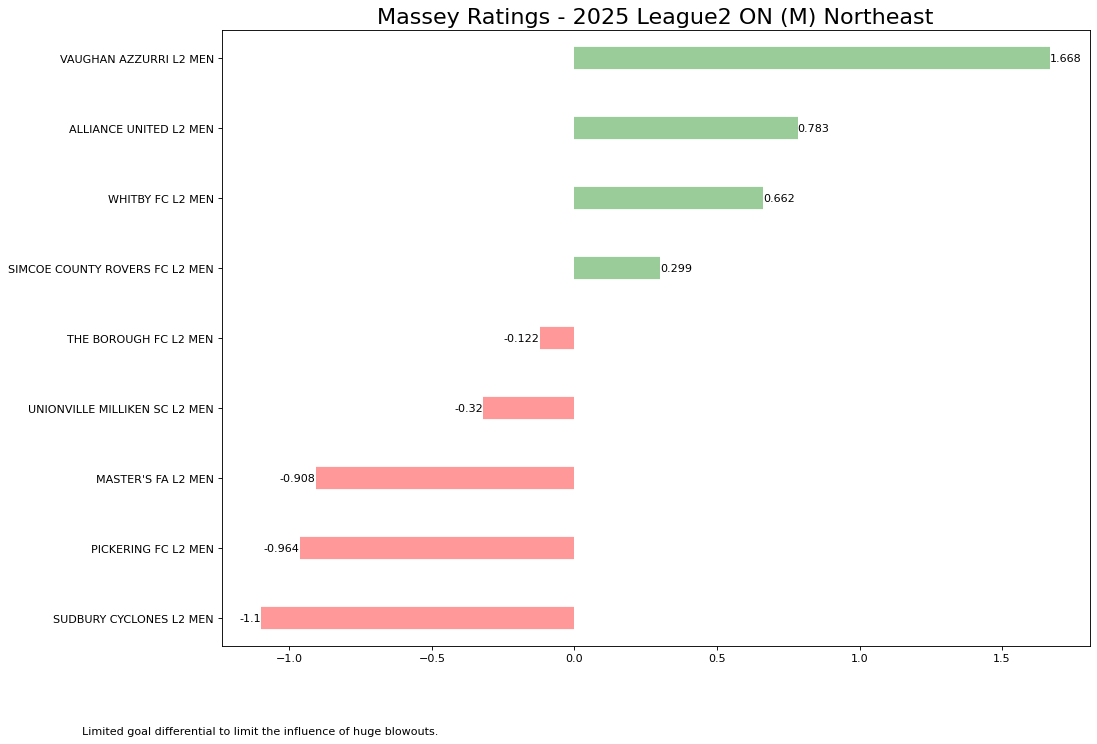

In [28]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Northeast', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()